# Segmentação de imagens usando K-Means

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


original_image = cv2.imread("alface.jpg")

Converter BGR para RGB

In [2]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

Converter a matriz da imagem MxNx3 para uma matriz Kx3, onde K=MxN e cada linha é um vetor

In [3]:
vectorized = img.reshape((-1,3))

É preciso converter os valores dos pixels (unit8) para tipo float, pois é uma requisição do K-means

In [4]:
vectorized = np.float32(vectorized)

Vamos agrupar com k = 3 porque se você olhar para a imagem acima ela tem 3 cores, grama e floresta de cor verde, mar azul e litoral azul esverdeado.

Defina critérios, número de clusters(K) e aplique k-means()

In [5]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

O OpenCV fornece a função `cv2.kmeans(samples, nclusters(K), criteria, attempts, flags)` para fazer o agrupamento usando o kmeans.

1. samples: Devem ser do tipo np.float32, e cada pixel deve ser colocado em uma única coluna.

2. nclusters(K): Número de clusters necessários no final

3. criteria: São os critérios de término da iteração. Quando este critério é satisfeito, a iteração do algoritmo para. Na verdade, deve ser uma tupla de 3 parâmetros. Esse parâmetros são `( type, max_iter, epsilon )`:

Tipo de critérios de parada. Tem 3 flags como abaixo:

    cv.TERM_CRITERIA_EPS — interrompe a iteração do algoritmo se a precisão especificada, epsilon, for alcançada.
    cv.TERM_CRITERIA_MAX_ITER — para o algoritmo após o número especificado de iterações, max_iter.
    cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER — interrompe a iteração quando qualquer uma das condições acima for atendida.
    
4. attempts: Sinalizador para especificar o número de vezes que o algoritmo é executado usando diferentes labels iniciais. O algoritmo retorna os labels que produzem a melhor compacidade. Essa compacidade é retornada como saída.

5. flags: Este flag é usado para especificar como os centros iniciais são tomados. Normalmente, dois sinalizadores são usados para isso: `cv.KMEANS_PP_CENTERS` e `cv.KMEANS_RANDOM_CENTERS`.

In [6]:
K = 4
attempts=15
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)

In [7]:
center = np.uint8(center) #Converter de volta para uint8.

Em seguida, temos que acessar os rótulos para geagrupar a imagem clusterizada

In [8]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

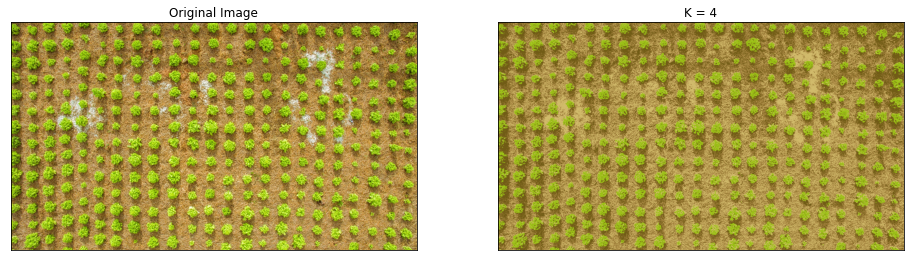

In [9]:
figure_size = 15
plt.figure(figsize=(16,8))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()